In [7]:
import sys
from os import listdir
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'data',
 'Digit Recognition Program.ipynb',
 'Number predictor.ipynb',
 'test.png',
 'theta']

In [8]:
#!{sys.executable} -m pip install python-mnist

## IMPORTING MNIST AND DATASET


In [9]:
from mnist import MNIST
from os.path import expanduser

home = "..\DigitRecognition\data"
mndata = MNIST(home)

images, labels = mndata.load_training()

Example no. 15853, the number is 2


(0.0, 28.0, 0.0, 28.0)

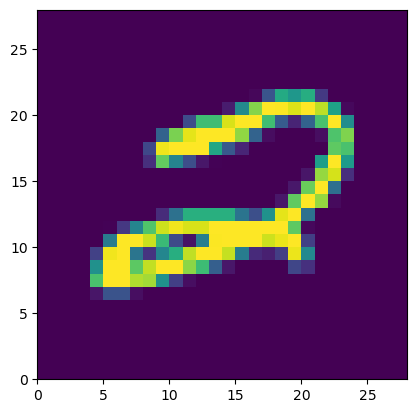

In [10]:
index = random.randrange(0, len(images))  # choose an index ;-)
raw_x = images[index]

# TESTING AND PLOT DATA
AA = np.reshape(raw_x,(28,28))[::-1]
AA = AA /255
print("Example no. {}, the number is {}".format(index,labels[index]))
plt.pcolormesh(AA)
plt.axis('square')

## DIVIDING DATASET

The digit dataset consists of 60k examples and will be divided into 2 categories
- Training set (50000 examples)
- Cross validation set (10000 examples)

The test set is a separated set imported later

In [11]:
def convertYClass(x,y,k):
    m, _ = np.shape(x)
    y_modded = np.zeros((m,k))
    for i in range(m):
        j = int(y[i])
        y_modded[i][j] = 1
    return y_modded

x_train = np.asarray(images[0:10000],dtype=np.float32)/255
y_train = np.asarray(labels[0:10000],dtype=np.float32)
x_cv = np.asarray(images[50000:],dtype=np.float32)/255
y_cv = np.asarray(labels[50000:],dtype=np.float32)

y_train = convertYClass(x_train,y_train,10)
y_cv = convertYClass(x_cv,y_cv,10)

## Linear logistic regression

__Defining sigmoid function__

In [12]:
def sigmoid(z):
    '''Calculating sigmoid function, giving z'''
    return 1 / (1+np.e**(-z))

__Defining cost function and cost gradient__

In [13]:
def costFun(theta,x,y):
    '''
    Given theta, data x, output y, calculate the cost function.
    
    Dimensions are as follow:
        x - matrix shape m * n
        theta - vector shape k * (n+1)
        y - matrix shape m * k
    
    '''
    m, n = np.shape(x)
    
    # Add bias to x
    x = np.c_[np.ones(m),x]
    y = np.transpose(y)
    theta = np.reshape(theta,(k,n+1))
    
    h = sigmoid(np.matmul(theta, np.transpose(x)))
    
    J = np.sum(-1/m * (y * np.log10(h) + (1-y) * np.log10(1-h)))
    
    return J


def costFunGrad(theta,x,y):
    '''
    Given theta, data x, output y, calculate the cost function partial derivatives for each theta.
    
    Dimensions are as follow:
        x - matrix shape m * n
        theta - matrix shape k * (n+1)
        y - matrix shape m * k
    
    '''
    m, n = np.shape(x)
    
    x = np.c_[np.ones(m),x]
    y = np.transpose(y)
    theta = np.reshape(theta,(k,n+1))
    
    h = sigmoid(np.matmul(theta, np.transpose(x)))
    
    grad = np.matmul((h - y),x) / m
    
    return np.reshape(grad,k*(n+1))

__Gredient descent__

In [14]:
def gradDescent(theta,x,y,alpha,maxiter):
    for i in range(maxiter):
        J = costFun(theta,x,y)
        J_grad = costFunGrad(theta,x,y)
        if (i+1) % 50 == 1:
            print("Iteration {}: Cost is {}".format(i+1,J))
        theta = theta - alpha * J_grad
    print("Iteration finished. Cost is {}".format(J))
    return theta

__Main training part__

In [15]:
m_train,n = np.shape(x_train)
k = 10
theta = np.zeros(k*(n+1))
alpha = 0.5

print(np.shape(theta))
print(costFun(theta,x_train,y_train))
print(np.shape(costFunGrad(theta,x_train,y_train)))

#opt.minimize(costFun,theta,args=(x_train,y_train),callback=True)

#opt.fmin_bfgs(costFun,theta,fprime=costFunGrad,args=(x_train,y_train))

theta = gradDescent(theta,x_train,y_train,alpha,1000)

(7850,)
3.010299956639813
(7850,)
Iteration 1: Cost is 3.010299956639813
Iteration 51: Cost is 0.4426629243712291
Iteration 101: Cost is 0.3814788430883365
Iteration 151: Cost is 0.35344935584015263
Iteration 201: Cost is 0.3361388055937329
Iteration 251: Cost is 0.32390546827785754
Iteration 301: Cost is 0.31457418133307474
Iteration 351: Cost is 0.307099092704859
Iteration 401: Cost is 0.30090335184411343
Iteration 451: Cost is 0.29563753439054774
Iteration 501: Cost is 0.29107509385400954
Iteration 551: Cost is 0.2870613864370017
Iteration 601: Cost is 0.28348649720631547
Iteration 651: Cost is 0.28026971562906067
Iteration 701: Cost is 0.27735016267979445
Iteration 751: Cost is 0.2746808710505853
Iteration 801: Cost is 0.2722249034611001
Iteration 851: Cost is 0.2699527254075051
Iteration 901: Cost is 0.267840377967386
Iteration 951: Cost is 0.26586817670852886
Iteration finished. Cost is 0.26405561350724693


__Visualising Theta__

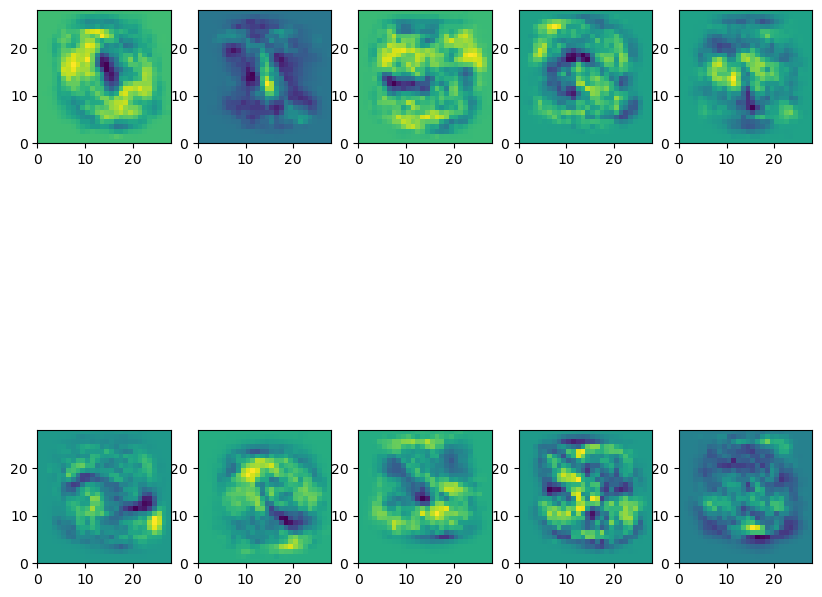

In [16]:
theta_reshaped = np.reshape(theta,(k,(n+1)))

theta_samples = [np.reshape(theta_reshaped[i][1:],(28,28)) for i in range(len(theta_reshaped))]

plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.pcolormesh(theta_samples[i])
    plt.axis('square')

__Save theta__

In [17]:
np.savetxt("theta",theta)

__Load test__

In [18]:
test_images, test_labels = mndata.load_testing()

x_test = np.asarray(test_images,dtype=np.float32)/255
y_test = np.asarray(test_labels,dtype=np.float32)
y_test = convertYClass(x_test,y_test,10)

__Test for accuracy rate__

In [19]:
def accRate(theta,x,y):
    '''
    Dimensions are as follow:
        x - matrix shape m * n
        theta - vector shape k * (n+1)
        y - matrix shape m * k
    
    '''
    m, n = np.shape(x)
    _, k = np.shape(y)
    
    x = np.c_[np.ones(m),x]
    theta = np.reshape(theta,(k,n+1))
    
    h = sigmoid(np.matmul(theta, np.transpose(x)))
    h = np.transpose(h)
    
    correct = 0
    for i in range(m):
        predicted = np.argmax(h[i])
        actual = np.argmax(y[i])
        if predicted == actual:
            correct += 1
        
    acc_rate = correct / m
    return acc_rate


In [20]:
acc = accRate(theta,x_test,y_test) * 100
print("The accuracy rate of theta is {}%".format(np.round(acc,2)))

The accuracy rate of theta is 90.84%


__Test on data__

In [21]:
def predict(theta,input_x):
    
    input_x = np.append(1,input_x)
    theta = np.reshape(theta,(k,n+1))
    
    h = sigmoid(np.matmul(theta, np.transpose(input_x)))
    h = np.transpose(h)
    
    predicted = np.argmax(h)
    
    return predicted, h

ID 8341
MY PREDICTION IS 6
ACTUAL RESULT 6


<IPython.core.display.Javascript object>


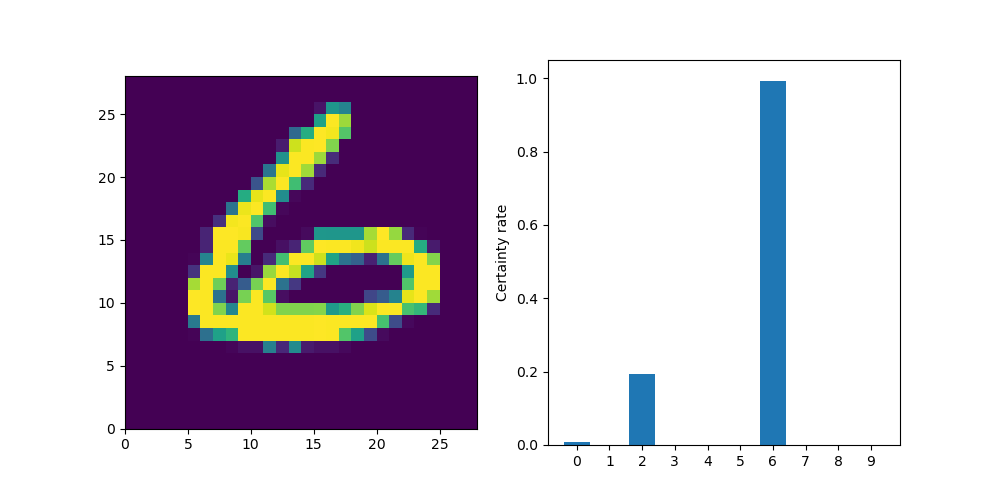

In [26]:
#while True:
ind = random.randrange(0, len(y_test)) 
inp_x = x_test[ind]

pred , h = predict(theta,inp_x)
actual = np.argmax(y_test[ind])
    
    #if pred != actual:
       #break
print("ID {}".format(ind))
print("MY PREDICTION IS {}".format(pred))
print("ACTUAL RESULT {}".format(actual))

inp_x = np.reshape(inp_x,(28,28))[::-1]
inp_x = inp_x /255

%matplotlib notebook
fig, [ax1,ax2] = plt.subplots(1,2,figsize=(10, 5))

ax1.pcolormesh(inp_x)
ax1.axis('square')

x_ticks = np.arange(10)
ax2.bar(x_ticks,height=h)
ax2.set_xticks(x_ticks)
ax2.set_ylabel('Certainty rate')
ax2.set_ylim(0,1.05)
fig.show()

__Error analysis__

In [23]:
err_arr = np.zeros(k)
for i in range(len(x_test)):
    inp_x = x_test[ind]
    pred , _ = predict(theta,inp_x)
    actual = np.argmax(y_test[i])

    if pred != actual:
        err_arr[actual] += 1

print(err_arr)

[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974.    0.]
